## import libraries

In [113]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge,LinearRegression,Lasso
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
plt.style.use('seaborn')
%matplotlib inline

In [121]:
df = pd.read_csv('Ecommerce Customers.csv')
df.shape

(500, 8)

In [127]:
df.head(5)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [124]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## checkout the data

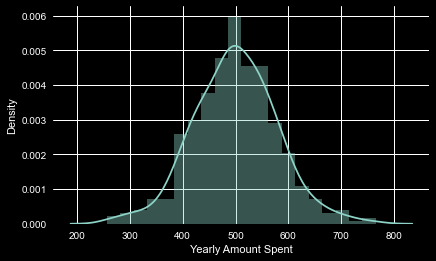

In [136]:
plt.style.use('dark_background')
sns.distplot(df['Yearly Amount Spent'])
plt.show()
                

##  The yearly Amount spent by the customers are normally distributed.

## To check the correlation between the both time spent on website and yearly amount spent by the customer

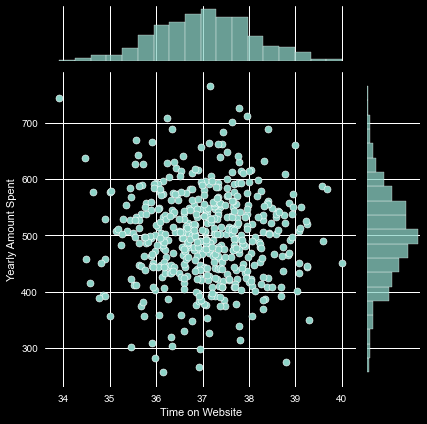

In [133]:
sns.jointplot(df['Time on Website'], df['Yearly Amount Spent'])
plt.show()

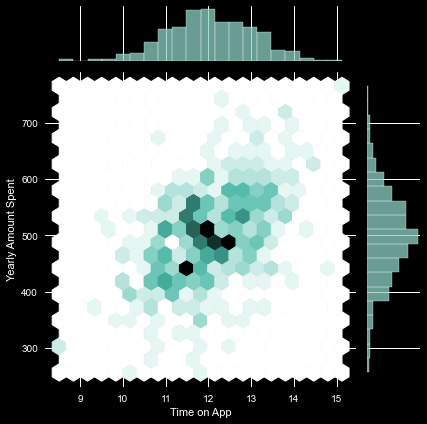

In [139]:
sns.jointplot(df['Time on App'], df['Yearly Amount Spent'], kind = 'hex')
plt.show()

## we can notice that amount spent if spending more time on app

## correlation between all variables in plot

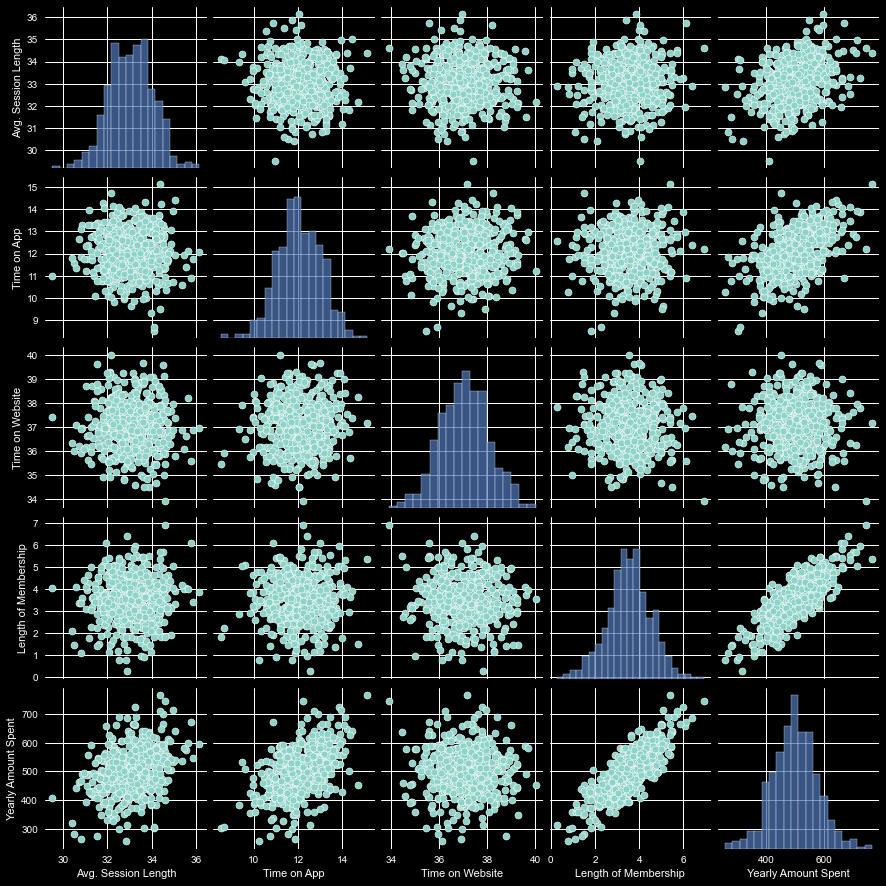

In [141]:
sns.pairplot(df)
plt.show()

<AxesSubplot:>

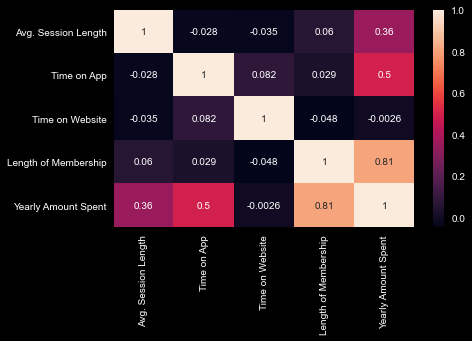

In [146]:
sns.heatmap(df.corr(), annot = True)

## we can know that most correlated variable is " Length Of Membership"

## implot with draws the scatter grah with regression line r facegrid

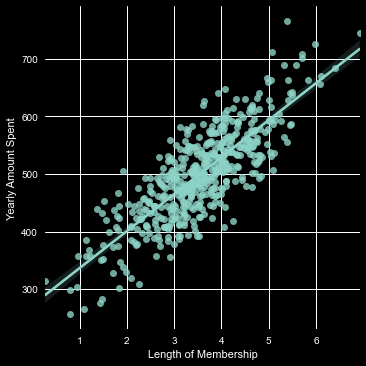

In [151]:
sns.lmplot('Length of Membership', 'Yearly Amount Spent', df)
plt.show()

# Linear regression method for predicting 

In [157]:
x = df.iloc[:,3 : 7]

In [162]:
y = df.iloc[:, -1]

## Split train and test data

In [165]:
x_train,x_test,y_train,y_test = train_test_split(x, y , test_size = 0.3)

In [167]:
model = LinearRegression()

In [171]:
model.fit(x_train,y_train)

LinearRegression()

In [182]:
y_pred = model.predict(x_test)

In [184]:
y_pred

array([451.15669918, 520.14141727, 281.73906126, 554.03369923,
       477.91006381, 324.45027578, 413.99659295, 458.18653792,
       648.83123599, 395.21145069, 558.17995995, 601.68396051,
       652.11782285, 433.82842209, 471.86411541, 506.86463213,
       506.27528789, 372.87285929, 497.02816245, 460.11390806,
       347.03635189, 531.79872795, 583.95400213, 597.83138545,
       602.18947938, 534.79074254, 486.1620525 , 572.89235703,
       513.28874934, 463.9641211 , 401.12060179, 556.67221343,
       523.15469699, 511.19084102, 426.98739335, 492.75646236,
       402.1447281 , 501.34098645, 533.96294809, 481.81856658,
       401.06095779, 593.64108607, 423.5295181 , 406.72918247,
       478.83594477, 568.91879887, 553.23408244, 384.34490128,
       507.70339565, 537.96675325, 376.0022884 , 456.7902451 ,
       408.6583923 , 460.29308724, 408.5470399 , 559.3152553 ,
       434.31418063, 449.56976545, 576.68122991, 567.91158261,
       440.8072229 , 461.02831468, 511.77756297, 407.64

## Module Evalution

In [185]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [202]:
s = mean_absolute_error(y_test,y_pred)
d = mean_squared_error(y_test,y_pred)
e = r2_score(y_test,y_pred)
print(f" MAE is {s}")
print(f'MSE is {d}')
print(f'r2 is {e}')
      

 MAE is 7.7612841781656305
MSE is 98.65659015656499
r2 is 0.9848788597800634


## further checking the performance of the model due to 500 observation is less to measure the accurary of model

In [208]:
from sklearn.model_selection import cross_val_score

csv = cross_val_score(model, x_train,y_train,cv =10)

print('Accuracy : {:.2f}%'.format(csv.mean()*100) )

print('Standard : {:.2f}%'.format(csv.std()*100))

Accuracy : 98.04%
Standard : 0.85%


## the accuracy and standard deviation score are good we can conclude that our model is good

## Difference of predicted and y_test values in graph

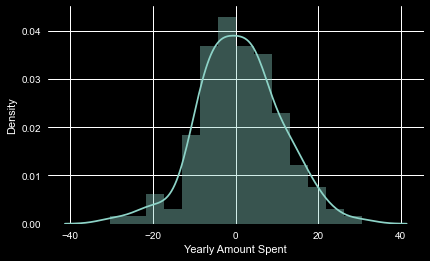

In [211]:
sns.distplot(y_test-y_pred)
plt.show()

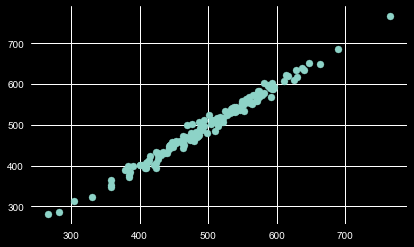

In [215]:
plt.scatter(y_test,y_pred)
plt.show()

In [218]:
model.intercept_

-1067.036570470723

In [221]:
model.coef_

pd.DataFrame(data = model.coef_, index=['Avg. Session Length','Time on App','Time on Website','Length of Membership'], columns = ['Coefficient'])

,Coefficient
Avg. Session Length,26.077284
Time on App,38.781105
Time on Website,0.505067
Length of Membership,61.694424
